╭────┬───────────────────────────┬──────────┬─────────────────┬─────────────────────────────┬──────────────┬─────────────────────────────┬─────────────────╮
│    │ Provinsi                  │   Banjir │   Cuaca Ekstrem │   Gelombang Pasang / Abrasi │   Gempa Bumi │   Kebakaran Hutan dan Lahan │   Tanah Longsor │
├────┼───────────────────────────┼──────────┼─────────────────┼─────────────────────────────┼──────────────┼─────────────────────────────┼─────────────────┤
│  0 │ Aceh                      │      110 │              51 │                           1 │            0 │                          51 │               9 │
│  1 │ Bali                      │       11 │               6 │                           0 │            3 │                           0 │              15 │
│  2 │ Banten                    │       52 │              24 │                           0 │            2 │                           1 │               2 │
│  3 │ Bengkulu                  │       36 │             

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


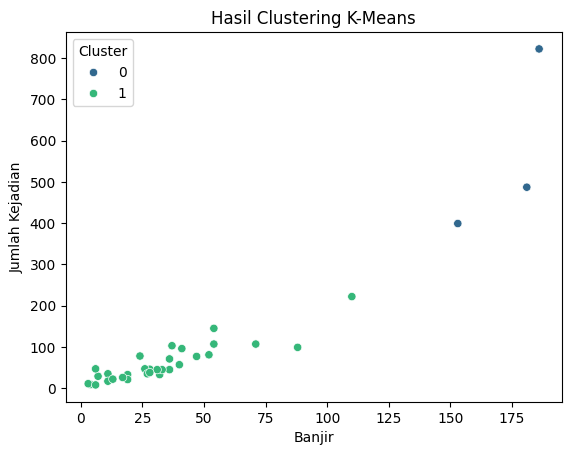

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

{2: 0.4980489421569313, 3: 0.2847272810881712, 4: 0.646971946769314, 5: 0.48188507925086677, 6: 0.4722010597413619, 7: 0.4952458544951065, 8: 0.5678198776362948, 9: 0.4692371689438572, 10: 0.47040962731379193}
+--------------------+----------------------+
| Number of Clusters | Davies–Bouldin Index |
+--------------------+----------------------+
|         2          |  0.4980489421569313  |
|         3          |  0.2847272810881712  |
|         4          |  0.646971946769314   |
|         5          | 0.48188507925086677  |
|         6          |  0.4722010597413619  |
|         7          |  0.4952458544951065  |
|         8          |  0.5678198776362948  |
|         9          |  0.4692371689438572  |
|         10         | 0.47040962731379193  |
+--------------------+----------------------+


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import pandas as pd #stabular
import numpy as np #matriks/array
import matplotlib.pyplot
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt
# from prettytable import PrettyTable
from tabulate import tabulate

#read data
data = pd.read_csv('datacleaning.csv')
shape = data.shape
# print(data)
print(tabulate(data, headers='keys', tablefmt='rounded_outline'))
print(data.dtypes)

#-----------Check for missing values, if any missing value, chnage to 0
dataset = data.fillna(0)
df = pd.DataFrame(dataset)
# print(dataset.isnull().sum())
# print(dataset.columns)

#-----------change object data to numeric // transformasi data
#-----------no need change dtype because all of data has been numeric
# print(dataset.dtypes)


#-----------selecte feature that we can use for clustering
features = df.drop(['Provinsi'], axis=1)

#-----------add column 'Jumlah Kejadian'
dataset['Jumlah Kejadian'] = dataset.iloc[:, 1:].sum(axis=1)

#-----------Normalisasi data
scaler = StandardScaler()
normalizeData = scaler.fit_transform(features)

#-----------seperate data for train and test woth train_split_test with train 80% and test 20%
# train_data, test_data = train_test_split(features, test_size=0.2, random_state=42)

#-----------Process data mining
dataKmeans = KMeans(n_clusters=2, random_state=42)
clusters = dataKmeans.fit_predict(features)

# print(clusters)
dataset['Cluster'] = clusters

# print(tabulate(dataset, headers='keys', tablefmt='rounded_outline'))
#----------menghitung provinsi apa saja yang masuk ke dalam tiap cluster
cluster_counts = dataset['Cluster'].value_counts()
print(cluster_counts)
# print(dataset)

# buat tabel untuk pengelompokan by cluster
table_data = []
grouped_data = dataset.groupby('Cluster')
#loop data setnya
for cluster, group in grouped_data:
  # print(cluster)
  # print(group)
  provinsi_list = ', '.join(group['Provinsi'])
  print(provinsi_list)
  table_data.append([f'Cluster {cluster}', provinsi_list])
print(tabulate(table_data, headers=['Cluster', 'Provinsi'], tablefmt='pretty', numalign="grid", maxcolwidths=[10, 50]))



# ----------Visualisasi hasil clustering
sns.scatterplot(x='Banjir', y='Jumlah Kejadian', hue='Cluster', data=dataset, palette='viridis')
plt.title('Hasil Clustering K-Means')
plt.show()


# def davies_bouldin_index(data, clusters):
#     cluster_centers = []
#     for cluster in set(clusters):
#         cluster_data = data[dataset['Cluster'] == cluster].iloc[:, :-1]
#         center = cluster_data.mean().values
#         cluster_centers.append(center)

#     distances = pairwise_distances(cluster_centers)
#     max_values = np.max(np.where(np.eye(len(cluster_centers)), -np.inf, distances), axis=1)

#     dbi = np.mean(max_values)
#     return dbi

# # Menampilkan hasil Davies–Bouldin Index
# dbi = davies_bouldin_index(features, clusters)
# print(f'Davies–Bouldin Index: {dbi}')


#------------------- test davies_bouldin_score -----------------------------------------------------
from sklearn.metrics import davies_bouldin_score

results={}
for i in range(2,11):
  kmeans = KMeans(n_clusters=i,random_state=30)
  labels= kmeans.fit_predict(features)
  db_index=davies_bouldin_score(features,labels)
  results.update({i:db_index})
print(results)
table_data = [["Number of Clusters", "Davies–Bouldin Index"]]
for k, v in results.items():
    table_data.append([k, v])

print(tabulate(table_data, headers="firstrow", tablefmt="pretty", numalign="center"))







/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[203.99999999999997]
[203.99999999999997, 120.53143896112881]
[203.99999999999997, 120.53143896112881, 88.07484084262498]
[203.99999999999997, 120.53143896112881, 88.07484084262498, 65.0895553274208]
[203.99999999999997, 120.53143896112881, 88.07484084262498, 65.0895553274208, 45.130110749359076]
[203.99999999999997, 120.53143896112881, 88.07484084262498, 65.0895553274208, 45.130110749359076, 35.27271308629732]
[203.99999999999997, 120.53143896112881, 88.07484084262498, 65.0895553274208, 45.130110749359076, 35.27271308629732, 27.79499908816565]
[203.99999999999997, 120.53143896112881, 88.07484084262498, 65.0895553274208, 45.130110749359076, 35.27271308629732, 27.79499908816565, 24.5589610882721]
[203.99999999999997, 120.53143896112881, 88.07484084262498, 65.0895553274208, 45.130110749359076, 35.27271308629732, 27.79499908816565, 24.5589610882721, 17.081247090140423]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[203.99999999999997, 120.53143896112881, 88.07484084262498, 65.0895553274208, 45.130110749359076, 35.27271308629732, 27.79499908816565, 24.5589610882721, 17.081247090140423, 12.907532669267432]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

╭─────┬──────────╮
│   0 │        1 │
├─────┼──────────┤
│   0 │ 0.612464 │
│   1 │ 0.439602 │
│   2 │ 0.436852 │
│   3 │ 0.461702 │
│   4 │ 0.318551 │
│   5 │ 0.348221 │
│   6 │ 0.309196 │
│   7 │ 0.344564 │
│   8 │ 0.359753 │
╰─────┴──────────╯


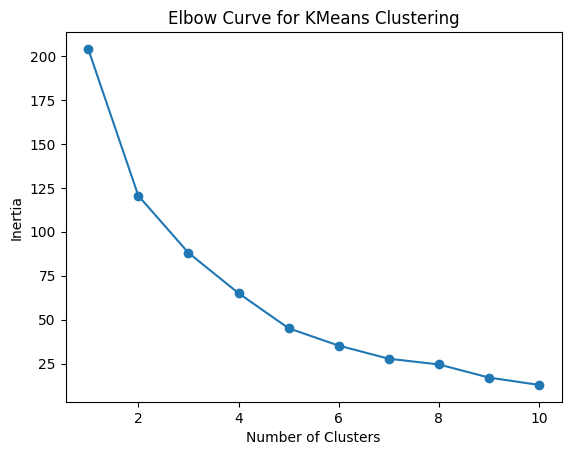

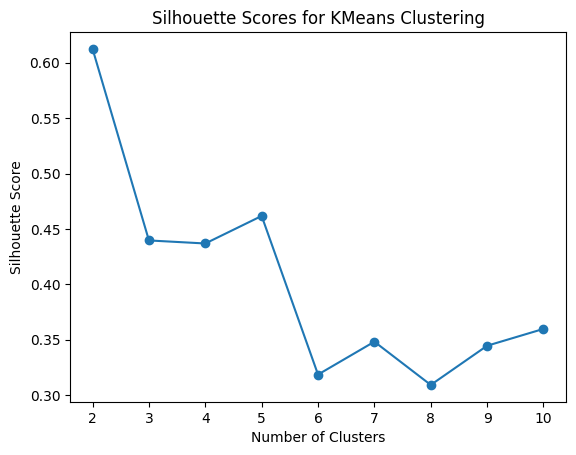

In [ ]:
#read data
data = pd.read_csv('datacleaning.csv')
shape = data.shape
# print(data.dtypes)

#-----------Check for missing values, if any missing value, chnage to 0
dataset = data.fillna(0)
df = pd.DataFrame(dataset)
features = df.drop(['Provinsi'], axis=1)
# print(features)
#-----------Normalisasi data
scaler = StandardScaler()
normalizeData = scaler.fit_transform(features)

# ------elbow
inertia = []
for idx, i in enumerate(range(1, 11)):
  kmeans = KMeans(n_clusters=i, random_state=42)
  # print(kmeans)
  kmeans.fit(normalizeData)
  # print(kmeans.inertia_)
  inertia.append(kmeans.inertia_)
  print(inertia)
# print(inertia)

# -------silhoutte
silhouette_scores = []
silhoutteTables = []
for idx, n_clusters in enumerate(range(2, 11)):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(normalizeData)
    silhouette_avg = silhouette_score(normalizeData, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    silhoutteTables.append([idx, silhouette_avg])

print(tabulate(silhoutteTables, headers='keys', tablefmt='rounded_outline'))
# print(tabulate(silhouette_scores, headers=['Cluster', 'Value'], tablefmt='rounded_outline'))


# Plotting elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Curve for KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plotting silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# print(dataset.isnull().sum())
# print(dataset.columns)

#-----------change object data to numeric
#-----------no need change dtype because all of data has been numeric
# print(dataset.dtypes)








In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.cluster import KMeans

# Read the dataset
data = pd.read_csv('datacleaning.csv')
dataset = data.fillna(0)
num_features = dataset.shape[1] - 1

# Determine initial centroids for Aceh and Jawa Barat
centroid_aceh = dataset[dataset['Provinsi'] == 'Aceh'].iloc[:, 1:].values
centroid_jawa_barat = dataset[dataset['Provinsi'] == 'Jawa Barat'].iloc[:, 1:].values

# Update: Ensure the number of features in each centroid matches the dataset
assert centroid_aceh.shape[1] == num_features
assert centroid_jawa_barat.shape[1] == num_features

# Combine centroids into a two-dimensional array
initial_centroids = np.array([centroid_aceh.flatten(), centroid_jawa_barat.flatten()])

# Create KMeans object with manual centroid initialization
kmeans = KMeans(n_clusters=initial_centroids.shape[0], init=initial_centroids, n_init=1, random_state=42)

# Perform clustering on the numeric dataset
kmeans.fit(dataset.iloc[:, 1:])

# Add the cluster label column to the DataFrame
dataset['Cluster'] = kmeans.labels_

# Display the clustering results
print(dataset[['Provinsi', 'Cluster']])

                     Provinsi  Cluster
0                        Aceh        0
1                        Bali        0
2                      Banten        0
3                    Bengkulu        0
4               DI Yogyakarta        0
5                 DKI Jakarta        0
6                   Gorontalo        0
7                       Jambi        0
8                  Jawa Barat        1
9                 Jawa Tengah        1
10                 Jawa Timur        0
11           Kalimantan Barat        0
12         Kalimantan Selatan        0
13          Kalimantan Tengah        0
14           Kalimantan Timur        0
15           Kalimantan Utara        0
16  Kepulauan Bangka Belitung        0
17             Kepulauan Riau        0
18                    Lampung        0
19                     Maluku        0
20               Maluku Utara        0
21        Nusa Tenggara Barat        0
22        Nusa Tenggara Timur        0
23                      Papua        0
24                Papua B

# New Section